# Vivino Bottle Analysis
# Questions

1) Given the success of your last project, the Vp of marketing just gave you a budget of $30,000 to acquire new users. How would you like to distribute the budget in order to attain the best customers and why?

2) What impact does premium have on the bottle line (number of bottles and total value of order), please explain how you got to your conclusion.

3) Provide a simple lifetime value model of customers (both frequency and monetary) that could be applied to new users entering the order cycle.

4) Provide a simple analysis of the monthly survival rate of customers.

In [1]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('orders.csv')
df.head(10)

,datecreated,SubtotalExTax,bottles,prem,user_trans,AttributedSource,InstalledAt
0,12/12/2016,269.70,6.0,0,FB10E3EF-B8A0-471A-9407-44F92CA578F9,adcolony,9/22/2016
1,11/5/2017,129.96,4.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
2,11/23/2017,159.94,6.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
3,6/20/2017,152.94,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
4,9/5/2017,125.04,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
5,10/28/2017,179.94,6.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
6,11/21/2017,277.41,12.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
7,11/21/2017,277.41,12.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
8,12/7/2017,87.96,4.0,1,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
9,1/6/2018,111.96,4.0,1,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017


File Description:<br />
DateCreated: date order was placed<br />
SubtotalExTax: order value (USD)<br />
Bottles: bottles in order<br />
Prem: order placed by premium member (1 = yes, 0 = no)<br />
User_Trans: unique user identifer<br />
AttributedSource: marketing channel order is attributed to<br />
InstalledAt: date user signed up<br />

In [3]:
# Remove Duplicate Records
df = df.drop_duplicates()

# Parsing The Data

In [4]:
# Checking For Any Trends Within Different Columns
df.head()

,datecreated,SubtotalExTax,bottles,prem,user_trans,AttributedSource,InstalledAt
0,12/12/2016,269.70,6.0,0,FB10E3EF-B8A0-471A-9407-44F92CA578F9,adcolony,9/22/2016
1,11/5/2017,129.96,4.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
2,11/23/2017,159.94,6.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
3,6/20/2017,152.94,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
4,9/5/2017,125.04,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017


In [5]:
df.describe()

,SubtotalExTax,bottles,prem
count,8752.000000,8748.000000,8752.000000
mean,209.035125,6.834819,0.050388
std,225.800856,4.087618,0.218758
min,6.000000,1.000000,0.000000
25%,119.700000,5.000000,0.000000
50%,161.940000,6.000000,0.000000
75%,233.890000,7.000000,0.000000
max,8056.560000,120.000000,1.000000


In [6]:
df[df['bottles'].isnull()]

,datecreated,SubtotalExTax,bottles,prem,user_trans,AttributedSource,InstalledAt
173,11/2/2016,87.00,NaN,0,4183A7A2-16A3-4149-9234-8EAF08C0C2C5,facebook,2/17/2016
545,10/31/2016,91.96,NaN,0,81B3F1ED-D488-4F95-B8FA-58ED67428DB6,taptica,7/21/2016
2396,10/31/2016,219.96,NaN,0,508337B0-7D4F-42FC-BDE3-6FAAB13B2C1A,NaN,NaN
2447,10/30/2016,219.96,NaN,0,23C75E16-43C2-48F7-9416-F516DA5AC2C2,NaN,NaN


In [7]:
df['bottles'] = df['bottles'].fillna(0)

In [8]:
df['AttributedSource'].value_counts(dropna = False).head()

NaN         8180
facebook     360
taptica      108
google        87
email         13
Name: AttributedSource, dtype: int64

In [9]:
df['prem'].value_counts()

0    8311
1     441
Name: prem, dtype: int64

In [10]:
df['datecreated'].value_counts(dropna = False).head()

3/12/2018     34
11/15/2017    32
3/11/2018     30
3/1/2018      29
5/18/2016     28
Name: datecreated, dtype: int64

In [11]:
df['InstalledAt'].value_counts(dropna = False).head()

NaN          8143
7/21/2016      45
6/30/2016      21
4/29/2016      19
8/21/2016      19
Name: InstalledAt, dtype: int64

In [12]:
df['bottles'].value_counts(dropna = False).head()

6.0     3434
4.0     1521
7.0     1203
12.0     784
5.0      444
Name: bottles, dtype: int64

In [13]:
df['SubtotalExTax'].value_counts(dropna = False).head()

119.94    358
149.94    235
179.94    230
107.94    192
113.94    171
Name: SubtotalExTax, dtype: int64

# Assumptions
My initial reaction to parsing the csv was that there were almost no attributed sources. 8,180 of the total 8,752 data entries had no source and 8,143 had no date of installation. This may be from misattribution, no attribution or were acquired organically. Either way I did not want to make assumptions so I went ahead and did analysis for users with attributed sources and date data for question 1 and part of question 2.

# Q1
1) Given the success of your last project, the Vp of marketing just gave you a budget of $\$$30,000 to acquire new users. How would you like to distribute the budget in order to attain the best customers and why?

Although Facebook brought in the most transaction revenue and unique payers, it was not the fourth highest valued source. On the other hand Taptica and Google provided high value users so I see room to scale there.
Email also provided high value but we only saw two unique users make payments. I would keep investing into email and note it is a high value source but the cost to acquire meaningful users may be expensive.

Answering this question comes down to how the company wants to scale and what kind of users we would like to acquire. Different sources can be used to acquire different types of users. 

I would go a stable and scalbale route. Already being steady sources of revenue I would put a majority of the $\$$30,000 towards our top 3 sources. $\$$8,000 to Google, $\$$8,000 to Taptica and $\$$7,000 to Facebook. I chose to invest more on Taptica because it is a very high value source and has been running for a less amount of time (See Timestamps Below) and has proved its worth. I also chose $\$$8,000 for Google knowing their large inventory and ability to scale. Facebook is a steady source of revenue so I kept it at a similar pace to Taptica and Google but would look for other places to allocate budget throughout the month if I saw higher value elsewhere.

The importance of testing sources and acquiring new inventory is also important. I chose to allocate the last $\$$8,000 towards testing new partners or giving a larger budget to our smaller channels/sources.

It appears that most users downloaded the app on Saturday(33 installs) and in third Sunday(27 installs). Although a very small sample size I would also like to push traffic harder on the weekends or run special promotions.

Purchase date seems to be a bit more distributed with Wednesday(32 installs) and Friday(33 installs) having the most installs. It seems that users purchase more wine as the weekend approaches so pushing sales could be key on these days.

In [14]:
df['AttributedSource'].value_counts(dropna = False)

NaN           8180
facebook       360
taptica        108
google          87
email           13
drawbridge       2
adcolony         1
liftoff          1
Name: AttributedSource, dtype: int64

Facebook

In [15]:
# Checking How Long Top 3 Sources Have Been Running
pd.to_datetime(df[df['AttributedSource'] == 'facebook']['InstalledAt']).min()

Timestamp('2015-10-21 00:00:00')

In [16]:
pd.to_datetime(df[df['AttributedSource'] == 'facebook']['InstalledAt']).max()

Timestamp('2018-02-25 00:00:00')

Google

In [17]:
pd.to_datetime(df[df['AttributedSource'] == 'google']['InstalledAt']).min()

Timestamp('2015-09-25 00:00:00')

In [18]:
pd.to_datetime(df[df['AttributedSource'] == 'google']['InstalledAt']).max()

Timestamp('2017-08-16 00:00:00')

Taptica

In [19]:
pd.to_datetime(df[df['AttributedSource'] == 'taptica']['InstalledAt']).min()

Timestamp('2016-06-09 00:00:00')

In [20]:
pd.to_datetime(df[df['AttributedSource'] == 'taptica']['InstalledAt']).max()

Timestamp('2017-06-16 00:00:00')

In [21]:
# Creating DataFrame For Q1 and Q3
dates_df = df[['user_trans','InstalledAt','datecreated','SubtotalExTax']].dropna()
dates_df['InstalledAt'] = pd.to_datetime(dates_df['InstalledAt'])
dates_df['datecreated'] = pd.to_datetime(dates_df['datecreated'])
dates_df.sort_values(['user_trans','datecreated'], ascending=False, inplace=True)

min_date = pd.DataFrame(dates_df.groupby('user_trans')['InstalledAt'].min()).reset_index()
max_date = pd.DataFrame(dates_df.groupby('user_trans')['datecreated'].max()).reset_index()
dates_df_diff = min_date.merge(max_date, on='user_trans')

dates_df_diff['Installed_weekday'] = dates_df_diff['InstalledAt'].dt.dayofweek
dates_df_diff['Datecreated_weekday'] = dates_df_diff['datecreated'].dt.dayofweek

dates_df_diff['Time_Difference'] = dates_df_diff['datecreated']-dates_df_diff['InstalledAt']

In [22]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Convert To Days
dates_df_diff.Time_Difference = dates_df_diff.Time_Difference.dt.days

# Taking Out Negative Values
dates_df_diff = dates_df_diff[dates_df_diff.Time_Difference > 0]

In [23]:
# Unique Users Purchase By Date
created_day =dict(dates_df_diff['Datecreated_weekday'].value_counts())

for num, day in enumerate(days):
    created_day[day] = created_day.pop(num)

created_day

{'Friday': 33,
 'Monday': 23,
 'Saturday': 23,
 'Sunday': 20,
 'Thursday': 27,
 'Tuesday': 26,
 'Wednesday': 32}

In [24]:
# Unique Users Installation By Date
installed_day = dict(dates_df_diff['Installed_weekday'].value_counts())

for num, day in enumerate(days):
    installed_day[day] = installed_day.pop(num)
    
installed_day

{'Friday': 23,
 'Monday': 21,
 'Saturday': 33,
 'Sunday': 27,
 'Thursday': 26,
 'Tuesday': 30,
 'Wednesday': 24}

In [25]:
# Creating Aggregates and Groupbys For Purchase Data For Individual Users
parameters = {
    'SubtotalExTax': {
    'sum_total_purchases': 'sum',
    'avg_purchase':'mean',
    'total_purchase_count': 'count'
    },
}

purchase_data =  df[['user_trans'
                     , 'SubtotalExTax'
                     , 'AttributedSource'
                     ,'prem', 'bottles']].groupby(['user_trans'
                                                   ,'AttributedSource'
                                                   ,'prem'
                                                   , 'bottles']).agg(parameters)

# Ravel() turns a Pandas multi-index into a simpler array, which we can combine into clearer column names:
purchase_data.columns = ["_".join(x) for x in purchase_data.columns.ravel()]

# Sorting By Sum of Total Purchases
sorted_purchase_data = purchase_data.sort_values('SubtotalExTax_sum_total_purchases', ascending=False)
sorted_purchase_data.reset_index(inplace=True)

/Users/tylerguo/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [26]:
# Data Now Shows On a Unique User Basis
sorted_purchase_data.head()

,user_trans,AttributedSource,prem,bottles,SubtotalExTax_sum_total_purchases,SubtotalExTax_avg_purchase,SubtotalExTax_total_purchase_count
0,81B3F1ED-D488-4F95-B8FA-58ED67428DB6,taptica,0,6.0,2308.92,128.273333,18
1,5E033627-AA58-4C06-AA4D-76B84FF56A48,google,0,6.0,2245.14,187.095000,12
2,81B3F1ED-D488-4F95-B8FA-58ED67428DB6,taptica,0,4.0,1541.60,154.160000,10
3,9800F5E7-8013-4C13-A650-769AA46A697F,google,0,5.0,1465.72,183.215000,8
4,6892283A-6E2B-42C8-8278-BB991EA329B5,taptica,1,4.0,1215.84,303.960000,4


In [27]:
# Creating DataFrame Aggregated by Source Type From Users With Full Purchase Data

# NaN           8180
# facebook       360
# taptica        108
# google          87
# email           13
# drawbridge       2
# adcolony         1
# liftoff          1
# Name: AttributedSource, dtype: int64
# Our DataFrame Matches With The Count Of The Actual Data, Making Sure All Values Are Present

parameters = {
    'SubtotalExTax_sum_total_purchases': {
        'Total Revenue':'sum',
    },
    'SubtotalExTax_total_purchase_count':{
        'Total # of Transactions':'sum'
    },
    'prem':{
        'Unique Users':'count'
    }
}

source_data = sorted_purchase_data[['AttributedSource'
                                    ,'SubtotalExTax_sum_total_purchases'
                                    ,'SubtotalExTax_total_purchase_count'
                                    ,'prem']].groupby('AttributedSource').agg(parameters)

source_data.columns = [''.join(x) for x in source_data.columns.ravel()]
source_data = source_data.reset_index()

source_data = source_data.rename(columns={'AttributedSource':'Source'
                               , 'SubtotalExTax_sum_total_purchasesTotal Revenue':'Total_Revenue'
                               ,'SubtotalExTax_total_purchase_countTotal # of Transactions':'Total_Number_of_Transactions'
                               ,'premUnique Users':'Unique_Users'})

source_data['Rev_Per_Payer'] = source_data['Total_Revenue']/source_data['Unique_Users']
source_data = source_data.sort_values('Total_Revenue', ascending=False)
source_data

/Users/tylerguo/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Source,Total_Revenue,Total_Number_of_Transactions,Unique_Users,Rev_Per_Payer
3,facebook,63398.53,360,229,276.849476
6,taptica,20791.82,108,54,385.033704
4,google,15111.36,87,41,368.569756
2,email,1880.69,13,6,313.448333
1,drawbridge,289.90,2,2,144.950000
0,adcolony,269.70,1,1,269.700000
5,liftoff,95.70,1,1,95.700000


Text(0,0.5,'User_Value')

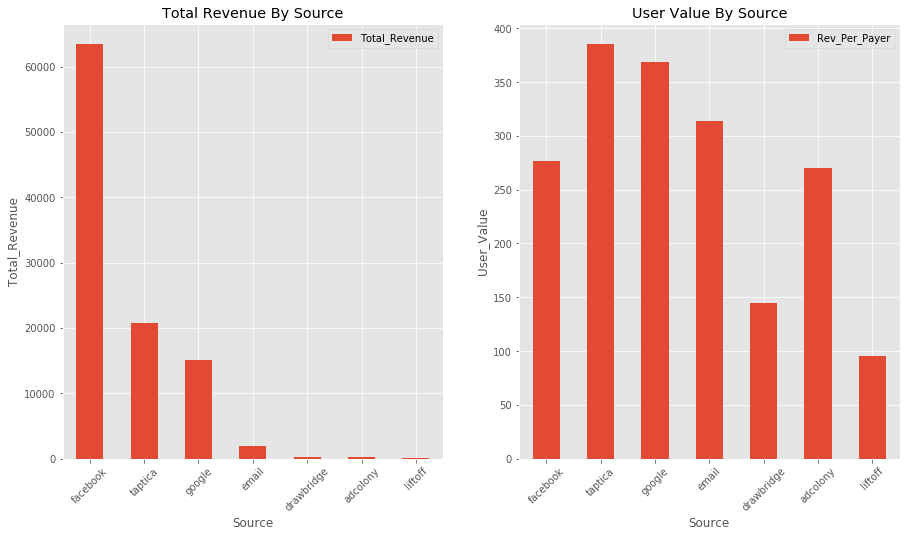

In [28]:
fig, axs = plt.subplots(1,2)

# Create Chart
source_data_chart_1 = source_data.plot(x=['Source'], y=['Total_Revenue'], kind='bar', figsize=(15,8)
                                       , ax=axs[0], rot=45)

# Set the xlabel and ylabel using class methods
source_data_chart_1.set_xlabel('Source')
source_data_chart_1.set_ylabel('Total_Revenue')
source_data_chart_1.set_title('Total Revenue By Source')

# Create Chart
source_data_chart_2 = source_data.plot(x=['Source'], y=['Rev_Per_Payer'], kind='bar', figsize=(15,8)
                                       , ax=axs[1], rot=45)

# Set the xlabel and ylabel using class methods
source_data_chart_2.set_title('User Value By Source')
source_data_chart_2.set_xlabel('Source')
source_data_chart_2.set_ylabel('User_Value')


# Q2 
2) What impact does premium have on the bottle line (number of bottles and total value of order), please explain how you got to your conclusion.

My initial thoughts after looking at the DataFrame is how few premium bottles were purchased for all users and users with full data. 

Users With Full Data Analysis:<br/>
purchased more non premium bottles on average with ~3.8 bottles purchased versus ~2.6 premium bottles. (See Table Below) While all users both averaged 6 bottles per transaction. Premium bottles on average had more transactions and generate more revenue per transaction when they are purchased. In short when they monetized, they monetized well; almost double the revenue.
This low purchase rate may be due to higher prices which also might be the factor resulting in more revenue. 

Transaction per unique users is higher for premium bottles which may mean those who enjoy a premium product may stick to that kind of product. This is a key factor for the marketing team. We could use the user ID's for those who enjoy premium wine and target them as high value users, for example CRM, push, email rengagement or use their ID's in a Facebook lookalike audience.

Missing Data Users:<br/>
Premium bottles still held true in terms of monetizing well. Although with a larger data set we see purchase prices go down and number of bottles purchased at one time lessen. Users with full data seem to be more valueable.

In [29]:
df.head()

,datecreated,SubtotalExTax,bottles,prem,user_trans,AttributedSource,InstalledAt
0,12/12/2016,269.70,6.0,0,FB10E3EF-B8A0-471A-9407-44F92CA578F9,adcolony,9/22/2016
1,11/5/2017,129.96,4.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
2,11/23/2017,159.94,6.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
3,6/20/2017,152.94,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
4,9/5/2017,125.04,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017


In [30]:
# Counting Premium Values In All Data
df['prem'].value_counts()

0    8311
1     441
Name: prem, dtype: int64

In [31]:
df.head()

,datecreated,SubtotalExTax,bottles,prem,user_trans,AttributedSource,InstalledAt
0,12/12/2016,269.70,6.0,0,FB10E3EF-B8A0-471A-9407-44F92CA578F9,adcolony,9/22/2016
1,11/5/2017,129.96,4.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
2,11/23/2017,159.94,6.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
3,6/20/2017,152.94,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
4,9/5/2017,125.04,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017


In [32]:
all_users_prem_bottles = df.groupby('prem').sum().reset_index()
all_users_prem_bottles

,prem,SubtotalExTax,bottles
0,0,1707406.02,56953.0
1,1,122069.39,2838.0


In [33]:
all_users_prem_users = df.groupby('prem').count().reset_index()
all_users_prem_users

,prem,datecreated,SubtotalExTax,bottles,user_trans,AttributedSource,InstalledAt
0,0,8311,8311,8311,8311,549,584
1,1,441,441,441,441,23,25


In [34]:
prem_df = all_users_prem_bottles.merge(all_users_prem_users[['prem','user_trans']], on='prem',how='left')
prem_df

,prem,SubtotalExTax,bottles,user_trans
0,0,1707406.02,56953.0,8311
1,1,122069.39,2838.0,441


In [35]:
# Creating More Informative Data
prem_df['Avg_Payment'] = prem_df['SubtotalExTax']/prem_df['user_trans']
prem_df['Bottles_Per_Transaction'] = prem_df['bottles']/prem_df['user_trans']

In [36]:
prem_df[['Avg_Payment','Bottles_Per_Transaction']]

,Avg_Payment,Bottles_Per_Transaction
0,205.439300,6.852725
1,276.801338,6.435374


In [37]:
# For Non Null Users
parameters2 = {
    'SubtotalExTax_sum_total_purchases': {
        'Non_Null_Purchases': 'count',
        'Total Revenue':'sum',
    },
    'SubtotalExTax_total_purchase_count':{
        'Total # of Transactions':'sum'
    },
    'bottles':{
        'Total Bottles Purchased':'sum'
    }
}

# Aggregations
full_user_data = sorted_purchase_data[['prem','SubtotalExTax_sum_total_purchases'
                      ,'SubtotalExTax_total_purchase_count','bottles']].groupby('prem').agg(parameters2)

# Cleaning The Table
full_user_data.columns = ['_'.join(x) for x in full_user_data.columns.ravel()]
full_user_data.reset_index(inplace=True)
full_user_data = full_user_data.rename(columns={'prem':'Bottle_Type'
                                                ,'SubtotalExTax_total_purchase_count_Total # of Transactions': 'Total_Num_of_Transactions'
                                                ,'SubtotalExTax_sum_total_purchases_Total Revenue': 'Total_Revenue'
                                                ,'SubtotalExTax_sum_total_purchases_Unique Purchases': 'Non_Null_Purchasers'
                                                ,'bottles_Total Bottles Purchased':'Bottles'})

/Users/tylerguo/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


0 = Non Premium <br/>
1 = Premium

In [38]:
# Bottle Data of Users With Full Purchase Data
full_user_data

,Bottle_Type,SubtotalExTax_sum_total_purchases_Non_Null_Purchases,Total_Revenue,Total_Num_of_Transactions,Bottles
0,0,322,96973.0,549,2079.0
1,1,12,4864.7,23,59.0


In [39]:
# Creating More Informative Data
full_user_data['Bottle_Per_Transaction'] = full_user_data['Bottles']/full_user_data['Total_Num_of_Transactions']
full_user_data['Revenue_Per_Bottle'] = full_user_data['Total_Revenue']/full_user_data['Bottles']
full_user_data['Revenue_Per_Bottle'] = full_user_data['Total_Revenue']/full_user_data['Bottles']
full_user_data['Revenue_Per_User'] = full_user_data['Total_Revenue']/full_user_data['SubtotalExTax_sum_total_purchases_Non_Null_Purchases']

In [40]:
full_user_data[['Bottle_Per_Transaction','Revenue_Per_Bottle','Revenue_Per_Bottle','Revenue_Per_User']]

,Bottle_Per_Transaction,Revenue_Per_Bottle,Revenue_Per_Bottle,Revenue_Per_User
0,3.786885,46.644060,46.644060,301.158385
1,2.565217,82.452542,82.452542,405.391667


# Q3
3) Provide a simple lifetime value model of customers (both frequency and monetary) that could be applied to new users entering the order cycle.

For my simple lifetime value analysis I decided to find the average time it took for a user on a specific day to make a purchse and how much that purchase would be. With this simple model we could calculate roughly how many purchases per year and amount a specific user who installed on a particular day is worth. This simple model could also be applied to what source the user installed from.

In [41]:
# df['Data_lagged'] = df.groupby(['Group'])['Data'].shift(1)
dates_df['Data_lagged'] = dates_df.groupby(['user_trans'])['datecreated'].shift(1)

dates_df['purchase_diff'] = (dates_df['datecreated'] - dates_df['Data_lagged']).dt.days*-1

dates_df['Installed_weekday'] = dates_df['InstalledAt'].dt.dayofweek
dates_df['Datecreated_weekday'] = dates_df['datecreated'].dt.dayofweek

In [42]:
dates_df_per_user = dates_df[['user_trans', 'purchase_diff', 'Installed_weekday', 'Datecreated_weekday','SubtotalExTax']]
dates_df_per_user = dates_df_per_user.groupby(['Installed_weekday']).mean()

In [43]:
dates_df_per_user['1Yr_CLV'] = (365/dates_df_per_user['purchase_diff'])*dates_df_per_user['SubtotalExTax']

In [44]:
dates_df_per_user

,purchase_diff,Datecreated_weekday,SubtotalExTax,1Yr_CLV
Installed_weekday,,,,
0,55.582278,3.225490,184.105490,1208.991530
1,60.303030,2.680412,161.564639,977.912602
2,63.000000,2.204082,212.595714,1231.705329
3,44.272727,2.692913,176.569449,1455.700897
4,39.702128,2.985714,187.755571,1726.123702
5,74.826923,3.241758,160.247143,781.673290
6,73.500000,2.890411,189.806986,942.578912


# Q4
4) Provide a simple analysis of the monthly survival rate of customers.

Method:<Br/>
I approached this by finding what month each user first made a purchase and seeing they made a purchase the following month. By joining we can see if that sser was there the following month. I calculated survial rate which is current month divided by month after. I excluded the latest month because that will have no retention/survial rate. Finally I took the lenght of the DataFrame to see how many months we observed. Over 36 months or 3 years, we saw an average survival rate of 0.42%. (0.4177094100946533)

In [45]:
# Creating DataFrame
df.head()

,datecreated,SubtotalExTax,bottles,prem,user_trans,AttributedSource,InstalledAt
0,12/12/2016,269.70,6.0,0,FB10E3EF-B8A0-471A-9407-44F92CA578F9,adcolony,9/22/2016
1,11/5/2017,129.96,4.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
2,11/23/2017,159.94,6.0,0,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,drawbridge,11/25/2017
3,6/20/2017,152.94,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017
4,9/5/2017,125.04,7.0,0,2D2FA876-7267-4E6A-8B72-96E03C4980B9,email,5/29/2017


In [46]:
# Finding The First Day Of The Month
df['TransactionMonth'] = pd.to_datetime(df['datecreated']).values.astype('datetime64[M]')
df['TransactionMonth_PlusMonth'] = df['TransactionMonth'] + pd.DateOffset(months=1)

In [47]:
retention = df[['user_trans','TransactionMonth','TransactionMonth_PlusMonth']]

In [48]:
# By Joining We Can See If That User Was There The Following Month
retention_full = retention.merge(retention, how='left', left_on=['user_trans','TransactionMonth_PlusMonth']
                , right_on=['user_trans','TransactionMonth'])

In [49]:
retention_full.head()

,user_trans,TransactionMonth_x,TransactionMonth_PlusMonth_x,TransactionMonth_y,TransactionMonth_PlusMonth_y
0,FB10E3EF-B8A0-471A-9407-44F92CA578F9,2016-12-01,2017-01-01,NaT,NaT
1,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,2017-11-01,2017-12-01,NaT,NaT
2,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,2017-11-01,2017-12-01,NaT,NaT
3,2D2FA876-7267-4E6A-8B72-96E03C4980B9,2017-06-01,2017-07-01,NaT,NaT
4,2D2FA876-7267-4E6A-8B72-96E03C4980B9,2017-09-01,2017-10-01,2017-10-01,2017-11-01


In [50]:
retention_full.head()

,user_trans,TransactionMonth_x,TransactionMonth_PlusMonth_x,TransactionMonth_y,TransactionMonth_PlusMonth_y
0,FB10E3EF-B8A0-471A-9407-44F92CA578F9,2016-12-01,2017-01-01,NaT,NaT
1,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,2017-11-01,2017-12-01,NaT,NaT
2,64AF6BBB-EE7E-42F9-8D0D-36BCA0364887,2017-11-01,2017-12-01,NaT,NaT
3,2D2FA876-7267-4E6A-8B72-96E03C4980B9,2017-06-01,2017-07-01,NaT,NaT
4,2D2FA876-7267-4E6A-8B72-96E03C4980B9,2017-09-01,2017-10-01,2017-10-01,2017-11-01


In [51]:
retention_full_rate = retention_full.groupby('TransactionMonth_x').count()

In [52]:
retention_full_rate = retention_full_rate[['user_trans', 'TransactionMonth_PlusMonth_y']]

In [53]:
retention_full_rate = retention_full_rate.rename(columns={'user_trans': 'current_month', 'TransactionMonth_PlusMonth_y': 'month_after'})

# Retnetion Rate Is Current Month Divided By Month After
retention_full_rate['Survival_Rate'] = retention_full_rate['month_after']/retention_full_rate['current_month']

In [54]:
# Excluding The Last Month
retention_full_rate[:-1]

,current_month,month_after,Survival_Rate
TransactionMonth_x,,,
2015-01-01,1,0,0.000000
2015-03-01,2,0,0.000000
2015-05-01,17,4,0.235294
2015-06-01,118,45,0.381356
2015-07-01,101,22,0.217822
2015-08-01,117,44,0.376068
2015-09-01,202,90,0.445545
2015-10-01,211,89,0.421801
2015-11-01,252,113,0.448413


In [55]:
len(retention_full_rate)-1

36

In [56]:
# Average Retention Over
retention_full_rate[:-1].Survival_Rate.mean()

0.4177094100946533